In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ! git clone https://github.com/bckenstler/CLR.git --q
# ! git clone https://github.com/JonnoFTW/keras_find_lr_on_plateau.git --q

In [2]:
%tensorflow_version 2.x

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Dense, Dropout, Activation, Flatten, concatenate, LeakyReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
import requests
import sqlite3
import cv2
import os.path
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import train_test_split
from datetime import datetime
# from CLR.clr_callback import CyclicLR
# from keras_find_lr_on_plateau.keras_lr_optimiser_callback.lr_finder import LRFinder

In [4]:
data = pd.read_csv('/content/drive/MyDrive/HyperFace/data/face_data.csv')

In [5]:
# @title datafetch
# img_paths = []
# # landmarks = []
# # visibility = []
# # roll_lst = []
# # pitch_lst = []
# # yaw_lst = []
# # gender = []
# # f_w = []
# # f_h = []
# # f_x = []
# # f_y = []

# images_path = "/content/drive/MyDrive/HyperFace/data/images/"
# storing_path = "/content/drive/MyDrive/HyperFace/data/faces/"
# #Image counter
# counter = 1
# #Open the sqlite database
# conn = sqlite3.connect('/content/drive/MyDrive/HyperFace/data/aflw.sqlite')
# c = conn.cursor()
# #Creating the query string for retriving: roll, pitch, yaw and faces position and gender
# #Change it according to what you want to retrieve
# select_string = "faceimages.filepath, faces.face_id, facepose.roll, facepose.pitch, facepose.yaw, facerect.x, facerect.y, facerect.w, facerect.h, facemetadata.sex"
# from_string = "faceimages, faces, facepose, facerect, facemetadata"
# where_string = "faces.face_id = facepose.face_id and faces.file_id = faceimages.file_id and faces.face_id = facerect.face_id and faces.face_id = facemetadata.face_id"
# query_string = "SELECT " + select_string + " FROM " + from_string + " WHERE " + where_string
# #It iterates through the rows returned from the query
# for row in c.execute(query_string):

#     #Using our specific query_string, the "row" variable will contain:
#     # row[0] = image path
#     # row[1] = face id
#     # row[2] = roll
#     # row[3] = pitch
#     # row[4] = yaw
#     # row[5] = face coord x
#     # row[6] = face coord y
#     # row[7] = face width
#     # row[8] = face heigh
#     # row[9] = sex

#     #Creating the full path names for input and output
#     input_path = images_path + str(row[0])
#     output_path = storing_path + str(row[0])

#     #If the file exist then open it       
#     if(os.path.isfile(input_path)  == True):
#         image = cv2.imread(input_path, 1)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #load the colour version

#         #Image dimensions
#         image_h, image_w, _ = image.shape
#         #Roll, pitch and yaw
#         # roll   = row[2]
#         # pitch  = row[3]
#         # yaw    = row[4]
#         #Face rectangle coords
#         face_x = row[5]
#         face_y = row[6]
#         face_w = row[7]
#         face_h = row[8]
#         # sex = (1 if row[9] == 'm' else 0)

#         #Error correction
#         if(face_x < 0): face_x = 0
#         if(face_y < 0): face_y = 0
#         if(face_w > image_w): 
#             face_w = image_w
#             face_h = image_w
#         if(face_h > image_h): 
#             face_h = image_h
#             face_w = image_h

#         img_paths.append(output_path)
#         # gender.append(sex)
#         # roll_lst.append(roll)
#         # pitch_lst.append(pitch)
#         # yaw_lst.append(yaw)
#         f_w.append(face_w)
#         f_h.append(face_h)
#         f_x.append(face_x)
#         f_y.append(face_y)


#         # select_str = "coords.feature_id, coords.x, coords.y"
#         # from_str = "featurecoords coords"
#         # where_str = "coords.face_id = {}".format(row[1])
#         # query_str = "SELECT " + select_str + " FROM " + from_str + " WHERE " + where_str
#         # lm = np.zeros((21,2)).astype(np.float32)
#         # v = np.zeros((21)).astype(np.int32)
        
#         # c2 = conn.cursor()
        
#         # for q in c2.execute(query_str):
#         #     lm[q[0]-1][0] = (q[1] - face_x)/face_w
#         #     lm[q[0]-1][1] = (q[2] - face_y)/face_h
#         #     v[q[0]-1] = 1
        
#         # lm = lm.reshape(42)
        
#         # landmarks.append(lm)
#         # visibility.append(v)

#         # c2.close()

#         # #Crop the face from the image
#         # image_cropped = np.copy(image[face_y:face_y+face_h, face_x:face_x+face_w])
#         # #Uncomment the lines below if you want to rescale the image to a particular size
#         # to_size = 227
#         # image_rescaled = cv2.resize(image_cropped, (to_size,to_size), interpolation = cv2.INTER_AREA)

#         # #Uncomment the line below if you want to use adaptive histogram normalisation
#         # #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
#         # #image_normalised = clahe.apply(image_rescaled)
#         # #Save the image
#         # #change "image_cropped" with the last uncommented variable name above
#         # cv2.imwrite(output_path, image_rescaled)


#         print("Counter: " + str(counter))
#         #Increasing the counter
#         counter = counter + 1 

#     #if the file does not exits it return an exception
#     else:
#         raise ValueError('Error: I cannot find the file specified: ' + str(input_path))

# #Once finished the iteration it closes the database
# c.close()

In [6]:
#@title dataframeprep
# cols = ['img_path','roll','pitch','yaw','sex']
# for i in range(21):
#   cols.append('landmark_'+str(i)+'_x')
#   cols.append('landmark_'+str(i)+'_y')
# for i in range(21):
#   cols.append('visibility_'+str(i))

# data = pd.DataFrame(columns = cols)
# data['img_path'] = img_paths
# data['roll'] = roll_lst
# data['pitch'] = pitch_lst
# data['yaw'] = yaw_lst
# data['sex'] = gender
# data.iloc[:,5:47] = landmarks
# data.iloc[:,47:] = visibility
# data.to_csv('/content/drive/MyDrive/HyperFace/data/face_data1.csv',index=False)

# data_sample = data.iloc[:4,:]
# sample_paths = ['/content/drive/MyDrive/HyperFace/data/faces/samples/image00035.jpg','/content/drive/MyDrive/HyperFace/data/faces/samples/image00032.jpg','/content/drive/MyDrive/HyperFace/data/faces/samples/image00168.jpg','/content/drive/MyDrive/HyperFace/data/faces/samples/image00179.jpg']
# data_sample['img_path'] = sample_paths
# data_sample.to_csv('/content/drive/MyDrive/HyperFace/data/sample1.csv',index=False)

In [7]:
fnames = list(data['img_path'])

In [8]:
len(fnames)

24384

In [9]:
#@title tfDatasets
# filelist_ds = tf.data.Dataset.from_tensor_slices(fnames)
# filelist_ds
# def get_label(file_path):
#   file_name= file_path.numpy().decode("utf-8")
#   data_row = data[data['img_path']==file_name]
#   pose = tf.squeeze(tf.constant([data_row['roll'].values[0],data_row['pitch'].values[0],data_row['yaw'].values[0]],dtype=tf.float32))
#   sex = tf.squeeze(tf.constant(data_row['sex'].values[0],dtype=tf.int32))
#   landmarks = tf.squeeze(tf.constant(data_row.iloc[:,5:47],dtype=tf.float32))
#   visibility = tf.squeeze(tf.constant(data_row.iloc[:,47:68],dtype=tf.int32))

#   return landmarks,visibility,pose,sex

# def process_img(img):
#   #color images
#   img = tf.image.decode_jpeg(img, channels=3) 
#   #convert unit8 tensor to floats in the [0,1]range
#   img = tf.image.convert_image_dtype(img, tf.float32) 
#   return img

# def combine_images_labels(file_path: tf.Tensor):
#   img = tf.io.read_file(file_path)
#   img = process_img(img)
#   lm,v,p,s = get_label(file_path)

#   img.set_shape((227,227,3))
#   lm.set_shape((42,))
#   v.set_shape((21,))
#   p.set_shape((3,))
#   s.set_shape(())
#   return img, lm, v, p, s

# ds_val = filelist_ds.take(1000)
# ds_train = filelist_ds.skip(1000)
# ds_train = ds_train.shuffle(25000).batch(BATCH_SIZE).from_generator(generator, output_types=(tf.float32,tf.float32,tf.int32,tf.float32,tf.int32))
# ds_val = ds_val.shuffle(25000).batch(BATCH_SIZE).from_generator(generator, output_types=(tf.float32,tf.float32,tf.int32,tf.float32,tf.int32))

# ds_train=filelist_ds.map(lambda x: tf.py_function(func=combine_images_labels,
#           inp=[x], Tout=(tf.float32,tf.float32,tf.int32,tf.float32,tf.int32)),num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)

# def map_func(img,lm,v,p,s):
#   img.set_shape((BATCH_SIZE,227,227,3))
#   lm.set_shape((BATCH_SIZE,42,))
#   v.set_shape((BATCH_SIZE,21,))
#   p.set_shape((BATCH_SIZE,3,))
#   s.set_shape((BATCH_SIZE,))
#   return {'input_img':img}, {
#         'landmarks': lm,
#         'visibility': v,
#         'pose': p,
#         'sex': s
#     }
# # ds_train = ds_train.map(map_func)
# ds_train = ds_train.map(map_func)
# ds_val = ds_val.map(map_func)
# ds_val = ds_train.take(1000)
# ds_train = ds_train.skip(1000)
# BATCH_SIZE = 4
# ds_train_batched = ds_train.batch(BATCH_SIZE).cache()
# ds_val_batched = ds_val.batch(BATCH_SIZE).cache()

In [10]:
def get_label(file_name):
  data_row = data[data['img_path']==file_name]
  pose = np.squeeze(np.array([data_row['roll'].values[0],data_row['pitch'].values[0],data_row['yaw'].values[0]],dtype=np.float32))
  sex = np.squeeze(np.array(data_row['sex'].values[0],dtype=np.int32))
  landmarks = np.squeeze(np.array(data_row.iloc[:,9:51],dtype=np.float32))
  visibility = np.squeeze(np.array(data_row.iloc[:,51:72],dtype=np.int32))

  return landmarks,visibility,pose,sex

def generator(img_paths):
  for img_path in img_paths:    
    img = plt.imread(img_path)/255
    lm,v,p,s = get_label(img_path)

    yield img, lm, v, p, s
    
def image_batch_generator(img_paths, batchsize=4):
  while True:
    np.random.shuffle(img_paths)
    ig = generator(img_paths)
    batch_img, batch_lm, batch_v, batch_p, batch_s = [], [],[], [], []
    
    for img, lm, v, p, s in ig:
      # Add the image and mask to the batch
      batch_img.append(img)
      batch_lm.append(lm)
      batch_v.append(v)
      batch_p.append(p)
      batch_s.append(s)
      # If we've reached our batchsize, yield the batch and reset
      if len(batch_img) == batchsize:
        batch_img = np.stack(batch_img, axis=0)
        batch_lm = np.stack(batch_lm, axis=0)
        batch_v = np.stack(batch_v, axis=0)
        batch_p = np.stack(batch_p, axis=0)
        batch_s = np.stack(batch_s, axis=0)
        yield {'input_img':batch_img}, {'landmarks':batch_lm, 'visibility':batch_v, 'pose':batch_p, 'sex':batch_s}

        batch_img, batch_lm, batch_v, batch_p, batch_s = [], [],[], [], []
    
    # If we have an nonempty batch left, yield it out and reset
    if len(batch_img) != 0:
      batch_img = np.stack(batch_img, axis=0)
      batch_lm = np.stack(batch_lm, axis=0)
      batch_v = np.stack(batch_v, axis=0)
      batch_p = np.stack(batch_p, axis=0)
      batch_s = np.stack(batch_s, axis=0)
      yield {'input_img':batch_img}, {'landmarks':batch_lm, 'visibility':batch_v, 'pose':batch_p, 'sex':batch_s}
      
      batch_img, batch_lm, batch_v, batch_p, batch_s = [], [],[], [], []

In [11]:
BATCH_SIZE = 32
# Split the data into a train and validation set
train_img_paths, val_img_paths = train_test_split(fnames, test_size=1000)

# Create the train and validation generators
traingen = image_batch_generator(train_img_paths, batchsize=BATCH_SIZE)
valgen = image_batch_generator(val_img_paths, batchsize=BATCH_SIZE)

In [12]:
import torchvision.models as models
alexnet_model = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [13]:
#@title SubClassingModel
# class HyperFaceAlexnet(tf.keras.Model):
#   def __init__(self):
#     super(HyperFaceAlexnet, self).__init__()
#     self.conv_1 = Conv2D(96, (11,11), strides = 4, activation = 'relu', padding = 'valid')
#     self.conv_1a = Conv2D(256, (4,4), strides = 4, activation = 'relu', padding = 'valid')
#     self.conv_2 = Conv2D(256, (5,5), strides = 1, activation = 'relu', padding = 'same')
#     self.conv_3 = Conv2D(384, (3,3), strides = 1, activation = 'relu', padding = 'same')
#     self.conv_3a = Conv2D(256, (2,2), strides = 2, activation = 'relu', padding = 'valid')
#     self.conv_4 = Conv2D(384, (3,3), strides = 1, activation = 'relu', padding = 'same')
#     self.conv_5 = Conv2D(256, (3,3), strides = 1, activation = 'relu', padding = 'same')
#     self.convall = Conv2D(192, (1,1), strides = 1, activation = 'relu', padding = 'valid')
#     self.maxpool = MaxPooling2D((3,3), strides = 2, padding = 'valid')
#     self.bn1 = BatchNormalization()
#     self.bn2 = BatchNormalization()
#     self.bn3 = BatchNormalization()
#     self.bn4 = BatchNormalization()
#     self.bn5 = BatchNormalization()
#     self.bn6 = BatchNormalization()
#     self.bn7 = BatchNormalization()
#     self.bn8 = BatchNormalization()
#     self.concatenate = concatenate
#     self.flatten = Flatten()
#     self.dense_1 = Dense(3072, activation = 'relu')
#     self.dense_2 = Dense(512, activation = 'relu')
#     #self.dense_d = Dense(1, activation = 'softmax')
#     self.dense_lm = Dense(42, activation = 'softmax', name='landmarks')
#     self.dense_v = Dense(21, activation = 'sigmoid', name='visibility')
#     self.dense_p = Dense(3, activation = 'softmax', name='pose')
#     self.dense_s = Dense(1, activation = 'softmax', name='sex')

#   def call(self, inputs):
#     conv1 = self.conv_1(inputs)
#     max1 = self.maxpool(conv1)
#     max1 = self.bn1(max1)

#     conv1a = self.conv_1a(max1)
#     conv1a = self.bn2(conv1a)

#     conv2 = self.conv_2(max1)
#     max2 = self.maxpool(conv2)
#     max2 = self.bn3(max2)

#     conv3 = self.conv_3(max2)
#     conv3 = self.bn4(conv3)

#     conv3a = self.conv_3a(conv3)
#     conv3a = self.bn5(conv3a)

#     conv4 = self.conv_4(conv3)
#     conv4 = self.bn6(conv4)

#     conv5 = self.conv_5(conv4)
#     pool5 = self.maxpool(conv5)
#     pool5 = self.bn7(pool5)

#     concat = self.concatenate([conv1a, conv3a, pool5])
#     concat = self.bn8(concat)
#     conv_all = self.convall(concat)
#     flat = self.flatten(conv_all)
#     fc_full = self.dense_1(flat)

#     #fc_detection = self.dense_2(fc_full)
#     fc_landmarks = self.dense_2(fc_full)
#     fc_visibility = self.dense_2(fc_full)
#     fc_pose = self.dense_2(fc_full)
#     fc_sex = self.dense_2(fc_full)

#     #out_detection = self.dense_3(fc_detection)
#     out_landmarks = self.dense_lm(fc_landmarks)
#     out_visibility = self.dense_v(fc_visibility)
#     out_pose = self.dense_p(fc_pose)
#     out_sex = self.dense_s(fc_sex)

#     return [out_landmarks, out_visibility, out_pose, out_sex]

# model = HyperFaceAlexnet()

In [17]:
def create_model():
  Inputs = tf.keras.Input(shape=(227,227,3),name='input_img')
  conv1 = Conv2D(64, (11,11), strides = 4, activation = 'relu', padding = 'valid', name='features.0')(Inputs)
  max1 = MaxPooling2D((3,3), strides = 2, padding = 'valid')(conv1)
  max1 = BatchNormalization()(max1)

  conv1a = Conv2D(256, (4,4), strides = 4, activation = 'relu', padding = 'valid')(max1)
  conv1a = BatchNormalization()(conv1a)

  conv2 = Conv2D(192, (5,5), strides = 1, activation = 'relu', padding = 'same', name='features.3')(max1)
  max2 = MaxPooling2D((3,3), strides = 2, padding = 'valid')(conv2)
  max2 = BatchNormalization()(max2)

  conv3 = Conv2D(384, (3,3), strides = 1, activation = 'relu', padding = 'same', name='features.6')(max2)
  conv3 = BatchNormalization()(conv3)

  conv3a = Conv2D(256, (2,2), strides = 2, activation = 'relu', padding = 'valid')(conv3)
  conv3a = BatchNormalization()(conv3a)

  conv4 = Conv2D(256, (3,3), strides = 1, activation = 'relu', padding = 'same', name='features.8')(conv3)
  conv4 = BatchNormalization()(conv4)

  conv5 = Conv2D(256, (3,3), strides = 1, activation = 'relu', padding = 'same', name='features.10')(conv4)
  pool5 = MaxPooling2D((3,3), strides = 2, padding = 'valid')(conv5)
  pool5 = BatchNormalization()(pool5)

  concat = concatenate([conv1a, conv3a, pool5])
  concat = BatchNormalization()(concat)
  conv_all = Conv2D(192, (1,1), strides = 1, activation = 'relu', padding = 'valid', name='convall')(concat)
  flat = Flatten()(conv_all)
  fc_full = Dense(3072, activation = 'relu', name='fcfull')(flat)

  #fc_full = Dropout(0.5)(fc_full)

  #fc_detection = Dense(512, activation = 'relu')(fc_full)
  fc_landmarks = Dense(512, activation = 'relu')(fc_full)
  fc_visibility = Dense(512, activation = 'relu')(fc_full)
  fc_pose = Dense(512, activation = 'relu')(fc_full)
  fc_sex = Dense(512, activation = 'relu')(fc_full)

  #out_detection = Dense(1, activation = 'softmax')(fc_detection)
  out_landmarks = Dense(42, activation = None, name='landmarks')(fc_landmarks)
  out_visibility = Dense(21, activation = 'sigmoid', name='visibility')(fc_visibility)
  out_pose = Dense(3, activation = None, name='pose')(fc_pose)
  out_sex = Dense(1, activation = 'sigmoid', name='sex')(fc_sex)

  model = tf.keras.Model(inputs = {'input_img':Inputs}, outputs = {'landmarks':out_landmarks, 'visibility':out_visibility, 'pose':out_pose, 'sex':out_sex})

  losses = {
      #"out_detection" : "binary_crossentropy",
      "landmarks" : "mean_squared_error",
      "visibility" : "mean_squared_error",
      "pose" : "mean_squared_error",
      "sex" : "binary_crossentropy"
  }

  loss_weights = {
      #"out_detection" : 1.0,
      "landmarks" : 1.0,
      "visibility" : 1.0,
      "pose" : 1.0,
      "sex" : 1.0
  }

  optimizer = tf.keras.optimizers.Adam()

  model.compile(optimizer = optimizer, loss = losses, loss_weights = loss_weights, metrics = ['accuracy'])

  return model

In [18]:
# model.build((None,227,227,3))

In [19]:
model = create_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
features.0 (Conv2D)             (None, 55, 55, 64)   23296       input_img[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 27, 27, 64)   0           features.0[0][0]                 
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 27, 27, 64)   256         max_pooling2d_3[0][0]            
____________________________________________________________________________________________

In [20]:
alexnet_wts = {}
for name,param in alexnet_model.named_parameters():
  param = param.detach().numpy()
  if (name.startswith('features')):
    shp = list(param.shape)
    shp.reverse()
    alexnet_wts[name] = np.reshape(param, tuple(shp))

In [21]:
model_layers = ['features.0','features.3','features.6','features.8','features.10']
for layer_name in model_layers:
  layer_weights = [alexnet_wts[layer_name+'.weight'],alexnet_wts[layer_name+'.bias']]
  model.get_layer(layer_name).set_weights(layer_weights)
  model.get_layer(layer_name).trainable = False

In [22]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
features.0 (Conv2D)             (None, 55, 55, 64)   23296       input_img[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 27, 27, 64)   0           features.0[0][0]                 
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 27, 27, 64)   256         max_pooling2d_3[0][0]            
____________________________________________________________________________________________

In [23]:
def calc_steps(data_len, batchsize):
    return (data_len + batchsize - 1) // batchsize

# Calculate the steps per epoch
train_steps = calc_steps(len(train_img_paths), BATCH_SIZE)
val_steps = calc_steps(len(val_img_paths), BATCH_SIZE)

In [25]:
''' CALLBACKS '''

checkpoint_path = '/content/drive/MyDrive/HyperFace/checkpoints/cp.ckpt'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq='epoch')  ##every epoch

log_dir = '/content/drive/MyDrive/HyperFace/logdir/'+ datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, update_freq = 200)

# reduce_lr = ReduceLROnPlateau(monitor='landmarks_loss', factor=0.2,
#                                 patience=2, min_lr=0.00001)

In [ ]:
#@title cyclicLearningRate
# # Configuration settings for LR finder
# start_lr = 1e-4
# end_lr = 1e0
# no_epochs = 10
# lr_finder = LRFinder(model)
# lr_finder.find_generator(generator=traingen,start_lr=start_lr,end_lr=end_lr,epochs=no_epochs,steps_per_epoch=train_steps)
# Set CLR options
# clr_step_size = int(4 * train_steps)
# base_lr = 1e-4
# max_lr = 1e-2
# mode='triangular'
# # Define the callback
# clr = CyclicLR(base_lr=base_lr, max_lr=max_lr, step_size=clr_step_size, mode=mode)

In [ ]:
#model.load_weights('/content/drive/MyDrive/HyperFace/checkpoints/cp.ckpt')

In [26]:
training_history = model.fit_generator(
    traingen, 
    steps_per_epoch=train_steps, 
    epochs=100, # Change this to a larger number to train for longer
    validation_data=valgen, 
    validation_steps=val_steps, 
    verbose=1,
    max_queue_size=10, # Change this number based on memory restrictions
    callbacks = [checkpoint_callback,tensorboard_callback]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
731/731 [==============================] - 4435s 6s/step - loss: 18.5195 - landmarks_loss: 0.4042 - pose_loss: 16.8762 - sex_loss: 1.0076 - visibility_loss: 0.2314 - landmarks_accuracy: 0.4712 - pose_accuracy: 0.6012 - sex_accuracy: 0.6185 - visibility_accuracy: 0.5904 - val_loss: 0.9273 - val_landmarks_loss: 0.0139 - val_pose_loss: 0.1218 - val_sex_loss: 0.5622 - val_visibility_loss: 0.2294 - val_landmarks_accuracy: 0.6570 - val_pose_accuracy: 0.6540 - val_sex_accuracy: 0.7050 - val_visibility_accuracy: 0.6420

Epoch 00001: saving model to /content/drive/MyDrive/HyperFace/checkpoints/cp.ckpt
Epoch 2/100
731/731 [==============================] - 153s 209ms/step - loss: 0.7767 - landmarks_loss: 0.0107 - pose_loss: 0.0629 - sex_loss: 0.4713 - visibility_loss: 0.2318 - landmarks_accuracy: 0.6820 - pose_accuracy: 0.7495 - sex_accuracy: 0.7741 - visibility_accuracy: 0.6301 - val_loss: 0.8580 - val_landmarks_loss: 0.0120 - val_pose_loss: 0.0684 - val_sex_loss: 0.5456 - val_visib

KeyboardInterrupt: ignored

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/HyperFace/logdir

In [33]:
def plot_landmarks(ind): #landmarks.shape = (42,) == np.array([1x,1y,2x,2y,3x,3y,....])
  landmarks_true = np.array(data.iloc[ind,9:51])
  visibility_true = np.array(data.iloc[ind,51:72])
  img_path = data.loc[ind,'img_path']
  img = np.expand_dims(plt.imread(img_path),0)
  outputs = model.predict({'input_img':img})
  landmarks_pred = np.squeeze(outputs['landmarks'])
  gender_pred = outputs['sex']
  pose_pred = np.squeeze(outputs['pose'])
  pose_pred = pose_pred*180/np.pi
  pose_pred = np.around(pose_pred,2)
  img_path1 = "/"
  for word in img_path.strip().split('/'):
    if (word!='faces1'):
      img_path1 =  img_path1 + word + '/'
    else:
      img_path1 =  img_path1 + 'images/'
  img_path1 = img_path1[:-1]
  if (img_path1[-6]=='_'):
    img_path1 = img_path1[:-6]+'.jpg'

  image_true = Image.open(img_path1).copy()
  image_pred = image_true.copy()
  draw_true = ImageDraw.Draw(image_true)
  draw_pred = ImageDraw.Draw(image_pred)
  fw = data[data['img_path']==img_path]['face_w']
  fh = data[data['img_path']==img_path]['face_h']
  fx = data[data['img_path']==img_path]['face_x']
  fy = data[data['img_path']==img_path]['face_y']
  r=2
  for i in range(0,41,2):
    if (visibility_true[i//2]):
      fxc = fx+fw/2
      fyc = fy+fh/2
      xl_true = landmarks_true[i]*fw + fxc
      yl_true = landmarks_true[i+1]*fh + fyc
      xl_pred = landmarks_pred[i]*fw + fxc
      yl_pred = landmarks_pred[i+1]*fh + fyc
      pt_true=(xl_true-r,yl_true-r,xl_true+r,yl_true+r)
      pt_pred=(xl_pred-r,yl_pred-r,xl_pred+r,yl_pred+r)
      draw_true.ellipse(pt_true,fill=(0,255,0))
      draw_pred.ellipse(pt_pred,fill=(0,255,0))
  gender = 'MALE' if gender_pred>0.5 else 'FEMALE'
  fnt = ImageFont.truetype("/content/drive/MyDrive/HyperFace/data/arial.ttf", 15)
  draw_true.text((0,0), "TRUE LANDMARKS", font=fnt, fill=(255,0,0,0))
  draw_pred.text((0,0), str(pose_pred[0])+'°,'+str(pose_pred[1])+'°,'+str(pose_pred[2])+'°', font=fnt, fill=(255,0,0,0))
  draw_pred.text((0,20), "GENDER PREDICTION: "+gender, font=fnt, fill=(0,255,0,0))
  # display(image_true)
  display(image_pred)  

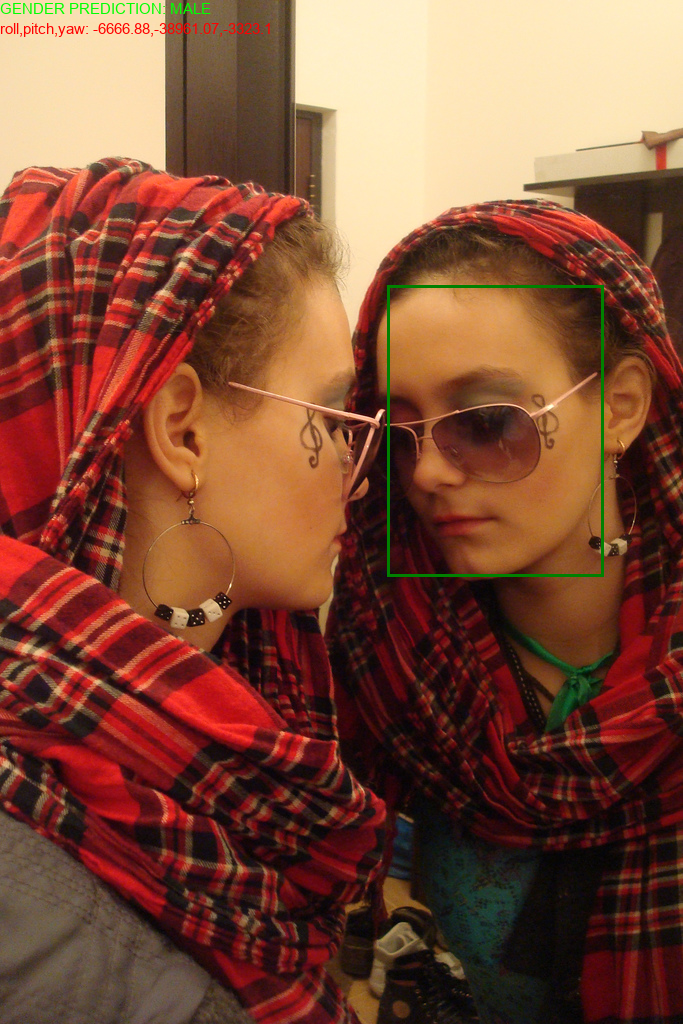

In [34]:
plot_landmarks(100)